In [10]:
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

# Exercise 1

Download the Iris dataset from UCI Machine Learning repository, <br> https://
archive.ics.uci.edu/ml/datasets/iris. <br> The data set contains 3 classes
of 50 instances each, where each class refers to a type of iris plant.

In [11]:
data = pd.read_csv('iris.data', names = ['sepal_L', 'sepal_W', 'petal_L', 'petal_W', 'class'])

In [12]:
data.head()
data['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

# Exercise 2

Visualize the data set in the 2D space of the first two features (sepal length
and sepal width). Points from different classes should be visualized with
different colors.

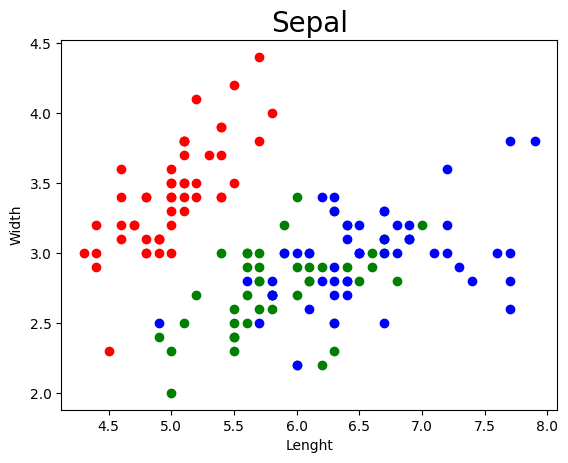

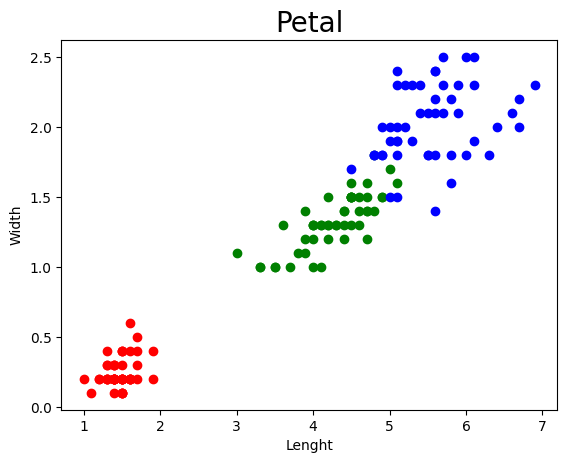

In [13]:
dfSet = data.loc[data['class'] == 'Iris-setosa']
dfVer = data.loc[data['class'] == 'Iris-versicolor']
dfVir = data.loc[data['class'] == 'Iris-virginica']

#Sepal
x, y = dfSet['sepal_L'].to_numpy(), dfSet['sepal_W'].to_numpy()
plt.scatter(x, y, color='red')
x, y = dfVer['sepal_L'].to_numpy(), dfVer['sepal_W'].to_numpy()
plt.scatter(x, y, color='green')
x, y = dfVir['sepal_L'].to_numpy(), dfVir['sepal_W'].to_numpy()
plt.scatter(x, y, color='blue')

plt.title('Sepal', fontsize=20)
plt.xlabel('Lenght', fontsize=10)
plt.ylabel('Width', fontsize=10)
plt.show()

#Petal
x, y = dfSet['petal_L'].to_numpy(), dfSet['petal_W'].to_numpy()
plt.scatter(x, y, color='red')
x, y = dfVer['petal_L'].to_numpy(), dfVer['petal_W'].to_numpy()
plt.scatter(x, y, color='green')
x, y = dfVir['petal_L'].to_numpy(), dfVir['petal_W'].to_numpy()
plt.scatter(x, y, color='blue')

plt.title('Petal', fontsize=20)
plt.xlabel('Lenght', fontsize=10)
plt.ylabel('Width', fontsize=10)
plt.show()

# Exercise 3

Calculate the average sepal length for each of the three classes.

In [14]:
print('avg sepal lenght for Iris-setosa', round(dfSet['sepal_L'].mean(), 3))
print('avg sepal lenght for Iris-versicolor', round(dfVer['sepal_L'].mean(), 3))
print('avg sepal lenght for Iris-virginica', round(dfVir['sepal_L'].mean(), 3))

avg sepal lenght for Iris-setosa 5.006
avg sepal lenght for Iris-versicolor 5.936
avg sepal lenght for Iris-virginica 6.588


# Exercise 4

Calculate the variance of sepal length for each of the three classes. (It
is advised to implement the variance calculation yourself rather than use
built-in functions: this will give you some hands-on experience with the
concept.)

In [15]:
def calVar(df):
    val = 0
    mean = df['sepal_L'].mean()
    for elm in df['sepal_L']:
        val += (elm - mean) ** 2
    return val/(df.shape[0]-1)
calVar(dfSet)
print('var sepal lenght for Iris-setosa', round(calVar(dfSet), 3))
print('var sepal lenght for Iris-versicolor', round(calVar(dfVer), 3))
print('var sepal lenght for Iris-virginica', round(calVar(dfVir), 3))
print()
print('var sepal lenght for Iris-setosa', round(dfSet['sepal_L'].var(), 3))
print('var sepal lenght for Iris-versicolor', round(dfVer['sepal_L'].var(), 3))
print('var sepal lenght for Iris-virginica', round(dfVir['sepal_L'].var(), 3))

var sepal lenght for Iris-setosa 0.124
var sepal lenght for Iris-versicolor 0.266
var sepal lenght for Iris-virginica 0.404

var sepal lenght for Iris-setosa 0.124
var sepal lenght for Iris-versicolor 0.266
var sepal lenght for Iris-virginica 0.404


# Exercise 5

Python is an interpreter language (as opposed to a compiled language)
and, therefore, in terms of run-time efficiency it is highly recommended
to use precompiled functions instead of for-loops whenever possible. Use
matrix-vector multiplications and other built-in functions to compute the
Euclidean distance between the first data point and all the remaining data
points without using any for-loops! Report the average distance and its
variance.

In [16]:
from sklearn.metrics.pairwise import euclidean_distances
def fromFirstEntry(col):
    lenghts_arr = data[col].to_numpy()
    fstVal_arr = np.array(data[col].iloc[0])
    lenghts_arr = lenghts_arr.reshape(-1, 1)
    fstVal_arr = fstVal_arr.reshape(-1, 1)

    distance = euclidean_distances(lenghts_arr, fstVal_arr)
    return np.mean(distance), np.var(distance)

print('avg =', round(fromFirstEntry('sepal_L')[0], 3))
print('var =', round(fromFirstEntry('sepal_L')[1], 3))

avg = 0.877
var = 0.465


# K-means clustering

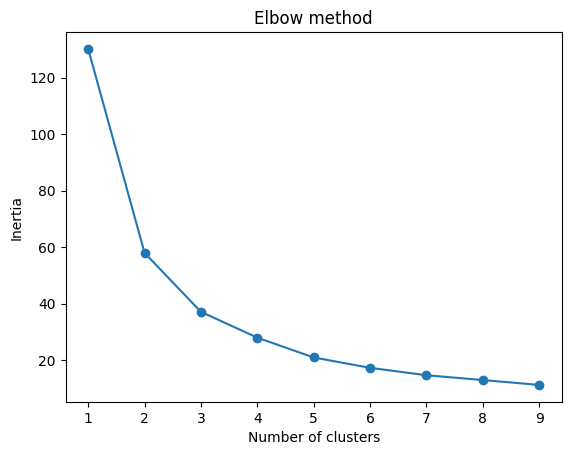

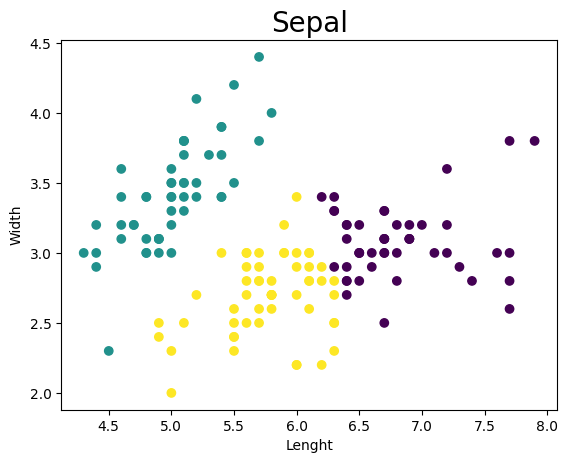

In [18]:
def kMeans_plotSepalLW():
    x, y = data['sepal_L'].to_numpy(), data['sepal_W'].to_numpy()
    data_samples = list(zip(x,y))
    inertias = []
    for i in range (1, 10):
        kmeans = KMeans(n_clusters=i)
        kmeans.fit(data_samples)
        inertias.append(kmeans.inertia_)
    plt.plot(range(1,10), inertias, marker='o')
    plt.title('Elbow method')
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.show()
    
    ''' We can see that the "elbow" on the graph is at K=3 '''
    kmeans = KMeans(n_clusters=3)
    kmeans.fit(data_samples)

    plt.scatter(x, y, c=kmeans.labels_)
    plt.title('Sepal', fontsize=20)
    plt.xlabel('Lenght', fontsize=10)
    plt.ylabel('Width', fontsize=10)
    plt.show()
warnings.filterwarnings('ignore')
kMeans_plotSepalLW()
warnings.filterwarnings('default')


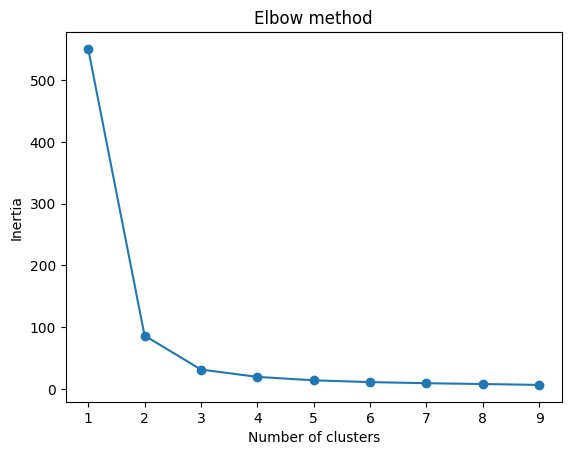

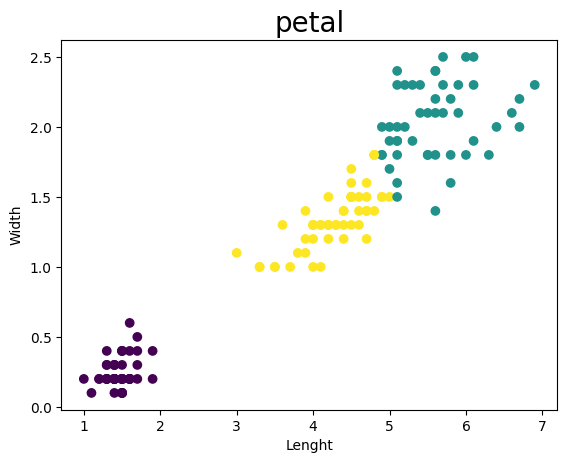

In [20]:
def kMeans_plotpetalLW():
    x, y = data['petal_L'].to_numpy(), data['petal_W'].to_numpy()
    data_samples = list(zip(x,y))
    inertias = []
    for i in range (1, 10):
        kmeans = KMeans(n_clusters=i)
        kmeans.fit(data_samples)
        inertias.append(kmeans.inertia_)
    plt.plot(range(1,10), inertias, marker='o')
    plt.title('Elbow method')
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.show()
    
    kmeans = KMeans(n_clusters=3)
    kmeans.fit(data_samples)

    plt.scatter(x, y, c=kmeans.labels_)
    plt.title('petal', fontsize=20)
    plt.xlabel('Lenght', fontsize=10)
    plt.ylabel('Width', fontsize=10)
    plt.show()
warnings.filterwarnings('ignore')
kMeans_plotpetalLW()
warnings.filterwarnings('default')